<a href="https://colab.research.google.com/github/SomaKorada07/END2.0/blob/main/Session%205/Session_5_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/datasetSentences.txt', sep = '\t', header = 0)
df.head()

,sentence_index,sentence
0,1,The Rock is destined to be the 21st Century 's...
1,2,The gorgeously elaborate continuation of `` Th...
2,3,Effective but too-tepid biopic
3,4,If you sometimes like to go to the movies to h...
4,5,"Emerges as something rare , an issue movie tha..."


In [3]:
df.columns

Index(['sentence_index', 'sentence'], dtype='object')

In [4]:
len(df['sentence_index']), len(df['sentence'])

(11855, 11855)

In [5]:
df_labels = pd.read_csv('/content/sentiment_labels.txt', sep = '|', header = 0)
df_labels.head()

,phrase ids,sentiment values
0,0,0.50000
1,1,0.50000
2,2,0.44444
3,3,0.50000
4,4,0.42708


In [6]:
len(df_labels)

239232

In [7]:
df_dict = pd.read_csv('/content/dictionary.txt', sep = '|', header = None)
df_dict.head()

,0,1
0,!,0
1,! ',22935
2,! '',18235
3,! Alas,179257
4,! Brilliant,22936


In [8]:
df_dict.columns

Int64Index([0, 1], dtype='int64')

In [9]:
type(df_dict[0]), type(df_dict[1])

(pandas.core.series.Series, pandas.core.series.Series)

In [10]:
df_dict.rename(columns = {0: 'phrase', 1: 'phrase ids'}, inplace = True)

In [11]:
# pd.to_numeric(df_dict['phrase ids'], downcast='integer')

In [12]:
df_dict.head()

,phrase,phrase ids
0,!,0
1,! ',22935
2,! '',18235
3,! Alas,179257
4,! Brilliant,22936


In [13]:
df_target = pd.merge(df_labels, df_dict, how = 'inner', left_on = 'phrase ids', right_on = 'phrase ids')

In [14]:
df_target.head()

,phrase ids,sentiment values,phrase
0,0,0.50000,!
1,1,0.50000,'
2,2,0.44444,' (
3,3,0.50000,' ( the cockettes
4,4,0.42708,' ( the cockettes )


In [15]:
common_sentences = df[df['sentence'].isin(df_target['phrase'])]

In [16]:
common_sentences

,sentence_index,sentence
0,1,The Rock is destined to be the 21st Century 's...
1,2,The gorgeously elaborate continuation of `` Th...
2,3,Effective but too-tepid biopic
3,4,If you sometimes like to go to the movies to h...
4,5,"Emerges as something rare , an issue movie tha..."
...,...,...
11850,11851,A real snooze .
11851,11852,No surprises .
11852,11853,We 've seen the hippie-turned-yuppie plot befo...
11853,11854,Her fans walked out muttering words like `` ho...


In [17]:
def sentence_exists(input_sentence):
    matching_phrase = df_target[df_target["phrase"] == input_sentence]["phrase ids"].values
    default_series = pd.Series({"phrase ids":-1000, "sentiment values": -1000}) ## For cases where we dont find a full sentence match
    if(len(matching_phrase)) > 0:
        phrase_id = np.int(matching_phrase[0])
        sentiment_value = df_target[df_target["phrase ids"] == matching_phrase[0]]["sentiment values"].values[0]
        default_series = pd.Series({"phrase ids":phrase_id, "sentiment values": sentiment_value})

    return default_series

In [18]:
common_sentences.loc[:, ["phrase ids", "sentiment values"]] =  common_sentences.loc[:,"sentence"].apply(sentence_exists)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [19]:
common_sentences.head()

,sentence_index,sentence,phrase ids,sentiment values
0,1,The Rock is destined to be the 21st Century 's...,226166.0,0.69444
1,2,The gorgeously elaborate continuation of `` Th...,226300.0,0.83333
2,3,Effective but too-tepid biopic,13995.0,0.51389
3,4,If you sometimes like to go to the movies to h...,14123.0,0.73611
4,5,"Emerges as something rare , an issue movie tha...",13999.0,0.86111


In [20]:
# pd.to_numeric(common_sentences['phrase ids'], downcast='integer')

In [21]:
common_sentences.head()

,sentence_index,sentence,phrase ids,sentiment values
0,1,The Rock is destined to be the 21st Century 's...,226166.0,0.69444
1,2,The gorgeously elaborate continuation of `` Th...,226300.0,0.83333
2,3,Effective but too-tepid biopic,13995.0,0.51389
3,4,If you sometimes like to go to the movies to h...,14123.0,0.73611
4,5,"Emerges as something rare , an issue movie tha...",13999.0,0.86111


In [22]:
common_sentences.shape

(11286, 4)

In [23]:
common_sentences.to_csv("CommonSentences.csv", index=False, sep="|")

# Training and test dataset
After applying above techiniques we get a combined DataFrame that has the following fields:

*   sentence_index : Original sentence_index in the datasetSentences.txt
*   sentence: The actual sentence
*   Phrase_Id: The Phrase_Id used for mapping/retrieving sentiment score
*   Sentiment_Score: Actual Sentiment score for the sentence

Now we split the DataFrame into Training and Test Dataframes. Note that we are not using the recommended train/ dev /test splits from the dataset.

In [24]:
train_df = common_sentences.sample(frac = 0.8) 
test_df = common_sentences[~common_sentences.sentence_index.isin(train_df.sentence_index)]

In [25]:
train_df.shape, test_df.shape

((9029, 4), (2257, 4))

In [26]:
train_df.to_csv("StanfordTrain.csv", index=False, sep="|")
test_df.to_csv("StanfordTest.csv", index=False, sep="|")

# Data Augmentation Techniques

##**Back Translation**

Another popular approach for augmenting text datasets is back translation. This involves translating a sentence from our target language into one or more other languages and then translating all of them back to the original language. We can use the Python library googletrans for this purpose. 

In [28]:
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 1.0MB 12.5MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp37-none-any.whl size=16368 sha256=a08fd3c30c1a045828b077b83dd70745752ed6f8396cb1fc78e2b5bd66c10e0b
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
Successfully built googletrans


In [29]:
import random
import googletrans
#import googletrans.Translator as Translator

translator = googletrans.Translator()
sentence = ['The dog slept on the rug', 'ran lazily']

available_langs = list(googletrans.LANGUAGES.keys()) 
trans_lang = random.choice(available_langs) 
print(f"Translating to {googletrans.LANGUAGES[trans_lang]}")

trans_lang

Translating to hungarian


'hu'

In [30]:
sentence = ['The dog slept on the rug']
available_langs = list(googletrans.LANGUAGES.keys()) 
trans_lang = random.choice(available_langs) 
print(f"Translating to {googletrans.LANGUAGES[trans_lang]}")

Translating to georgian


In [31]:
translations = translator.translate(sentence, dest=trans_lang) 
t_text = [t.text for t in translations]
print(t_text)

['ძაღლს ხალიჩაზე ეძინა']


In [32]:
translations_en_random = translator.translate(t_text, src=trans_lang, dest='en') 
en_text = [t.text for t in translations_en_random]
print(en_text)

['The dog slept on the carpet']


In [40]:
translator = googletrans.Translator()

def back_translate(sentence):
    # print(f"original eng sentence is {sentence}")
    available_langs = list(googletrans.LANGUAGES.keys()) 
    trans_lang = random.choice(available_langs)
    # print(f"translated lang is {trans_lang}")
    translations = translator.translate(sentence, dest=trans_lang)
    t_text = [t.text for t in translations]
    # print(f"translated text is {t_text}")
    translations_en_random = translator.translate(t_text, src=trans_lang, dest='en') 
    en_text = [t.text for t in translations_en_random]
    return en_text

In [41]:
back_translate([common_sentences.iloc[0].sentence])

['The cancer is destined to be the new "Conan" of the 21st century and he will make a splash even bigger than Arnold Schwarzenegger, Jean-Claude Van Damme or Steven Segal.']


## **Augmenting with Back_Translate**
In this method we make a translate from source English sentence to a sentence in random language and then back into English. We create a dataframe of around 4000 samples and append it back to the dataset

In [42]:
train_df.columns.values

array(['sentence_index', 'sentence', 'phrase ids', 'sentiment values'],
      dtype=object)

In [45]:
simpler_series_df = train_df.copy()
empty_series = { col:[] for col in train_df.columns.values}
my_new_df = pd.DataFrame(data=empty_series)

In [46]:
simpler_series_df.head()

,sentence_index,sentence,phrase ids,sentiment values
8830,8831,Every so often a movie comes along that confir...,145205.0,0.47222
9897,9898,"There 's a neat twist , subtly rendered , that...",188801.0,0.40278
1235,1236,Turns potentially forgettable formula into som...,27089.0,0.75000
1047,1048,The cast is uniformly excellent and relaxed .,26773.0,0.94444
5559,5560,Wonder of wonders -- a teen movie with a human...,111235.0,0.72222


In [47]:
simpler_series_df["sentence_index"] = simpler_series_df["sentence_index"].astype('int')

In [48]:
simpler_series_df["phrase ids"] = simpler_series_df["phrase ids"].astype('int')

In [49]:
simpler_series_df.head()

,sentence_index,sentence,phrase ids,sentiment values
8830,8831,Every so often a movie comes along that confir...,145205,0.47222
9897,9898,"There 's a neat twist , subtly rendered , that...",188801,0.40278
1235,1236,Turns potentially forgettable formula into som...,27089,0.75000
1047,1048,The cast is uniformly excellent and relaxed .,26773,0.94444
5559,5560,Wonder of wonders -- a teen movie with a human...,111235,0.72222


In [50]:
simpler_series_df.shape

(9029, 4)

In [51]:
simpler_series_df["sentence_index"].max()

11855

In [56]:
my_new_df.shape

(0, 4)

In [62]:
max_sentence_ids = simpler_series_df["sentence_index"].max()
for idx in simpler_series_df[2000:2500].itertuples():
    # print(idx._3)
    sentence = idx.sentence
    aug_sentence = back_translate([sentence])[0]
    max_sentence_ids += 1
    simpler_series_df.loc[max_sentence_ids] = [max_sentence_ids, aug_sentence, np.int(idx._3), idx._4]
    # print(simpler_series_df.shape)

In [63]:
simpler_series_df.shape

(9540, 4)

In [65]:
simpler_series_df.head(-10)

,sentence_index,sentence,phrase ids,sentiment values
8830,8831,Every so often a movie comes along that confir...,145205,0.47222
9897,9898,"There 's a neat twist , subtly rendered , that...",188801,0.40278
1235,1236,Turns potentially forgettable formula into som...,27089,0.75000
1047,1048,The cast is uniformly excellent and relaxed .,26773,0.94444
5559,5560,Wonder of wonders -- a teen movie with a human...,111235,0.72222
...,...,...,...,...
12859,12859,The noble tradition of men in drag hits an all...,149648,0.20833
12860,12860,"Passionate , irrational , long-suffering but c...",46486,0.77778
12861,12861,The way Coppola professes his love for movies ...,26929,0.87500
12862,12862,Adam Sandler is to Gary Cooper what a gnat is ...,143518,0.16667


In [66]:
simpler_series_df.to_csv("StanfordTranslate.csv", index = False, sep = "|")

## **Random Swap**
The random swap augmentation takes a sentence and then swaps words within it n times, with each iteration working on the previously swapped sentence. Here we sample two random numbers based on the length of the sentence, and then just keep swapping until we hit n.

In [68]:
def random_swap(sentence, n=5): 
    length = range(len(sentence)) 
    for _ in range(n):
        idx1, idx2 = random.sample(length, 2)
        sentence[idx1], sentence[idx2] = sentence[idx2], sentence[idx1] 
    return sentence

In [85]:
simpler_series_df['sentence'][1]

"The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth ."

In [94]:
' '.join(random_swap(simpler_series_df['sentence'][1].split()))

"words The elaborate continuation of `` gorgeously Lord of the Rings '' trilogy vision so The that a column Jackson huge can not adequately describe co-writer\\/director Peter of 's expanded is of J.R.R. Tolkien 's Middle-earth ."

For more on this please go through this [paper](https://arxiv.org/pdf/1901.11196.pdf).

# **Augmenting with Random Swap**

In [99]:
random_swap_df = simpler_series_df[simpler_series_df['sentence'].str.count('\s+')>10].sample(frac=0.5)
random_swap_df.shape

(3651, 4)

In [100]:
random_swap_df.head(5)

,sentence_index,sentence,phrase ids,sentiment values
1215,1216,Far more imaginative and ambitious than the tr...,25291,0.80556
858,859,Lee Jeong-Hyang tells it so lovingly and films...,25942,0.79167
3404,3405,Sayles is making a statement about the inabili...,68609,0.55556
2583,2584,`` Me Without You '' is a probing examination ...,227532,0.58333
8819,8820,To enjoy this movie 's sharp dialogue and deli...,150388,0.59722


In [101]:
random_swap_df['sentence'] = random_swap_df.sentence.str.split().apply(random_swap).apply(' '.join)

In [102]:
random_swap_df.head(5)

,sentence_index,sentence,phrase ids,sentiment values
1215,1216,Far more imaginative ambitious made animated t...,25291,0.80556
858,859,and Jeong-Hyang tells it beautifully lovingly ...,25942,0.79167
3404,3405,Sayles is making forward statement a generatio...,68609,0.55556
2583,2584,decades a Without You '' is a probing . of aga...,227532,0.58333
8819,8820,To sense this movie delightful sharp dialogue ...,150388,0.59722


# **Random Deletion**
As the name suggests, random deletion deletes words from a sentence. Given a probability parameter p, it will go through the sentence and decide whether to delete a word or not based on that random probability. Consider of it as pixel dropouts while treating images.

In [103]:
def random_deletion(words, p=0.5): 
    # if len(words) == 1: # return if single word
    #     return words
    remaining = list(filter(lambda x: random.uniform(0,1) > p,words)) 
    if len(remaining) == 0: # if not left, sample a random word
        return [random.choice(words)] 
    else:
        return remaining

In [106]:
random_deletion_df = simpler_series_df[simpler_series_df['sentence'].str.count('\s+')>10].sample(frac=0.5)
random_deletion_df.shape

(3651, 4)

In [107]:
random_deletion_df.head()

,sentence_index,sentence,phrase ids,sentiment values
2149,2150,A winning piece of work filled with love for t...,44342,0.791670
4887,4888,You can fire a torpedo through some of Clancy ...,111337,0.166670
5323,5324,"Saved from being merely way-cool by a basic , ...",108769,0.486110
6155,6156,"... while certainly clever in spots , this too...",103256,0.277780
9714,9715,This is the kind of movie that you only need t...,189034,0.097222


In [108]:
random_deletion_df['sentence'] = random_deletion_df.sentence.str.split().apply(random_deletion).apply(' '.join)
random_deletion_df.head(5)

,sentence_index,sentence,phrase ids,sentiment values
2149,2150,A the movies the .,44342,0.791670
4887,4888,torpedo of holes scripters deserve Oscars,111337,0.166670
5323,5324,from being .,108769,0.486110
6155,6156,... clever in this update Macbeth of,103256,0.277780
9714,9715,"the of you to watch for before you yourself , ...",189034,0.097222


In [114]:
final_train_df = pd.concat([simpler_series_df, random_deletion_df, random_swap_df], axis=0).reset_index(drop=True)

In [115]:
final_train_df.shape

(16842, 4)

## **Range expansion**
The sentiment scores are floats between [0,1] so we convert this to equivalent integers between 0 and 24(i.e 25 different classes)

In [116]:
final_train_df["label"] = 0

# def quantize_predictions(score_val):
#     return np.floor(score_val * 24)

def quantize_predictions(score_val):
    if(score_val >=0 and score_val <=0.2):
        return 0
    if(score_val > 0.2 and score_val <=0.4):
        return 1
    if(score_val > 0.4 and score_val <=0.6):
        return 2
    if(score_val > 0.6 and score_val <=0.8):
        return 3
    if(score_val > 0.8 and score_val <=1):
        return 4

final_train_df.loc[:,"label"] = final_train_df.loc[:,"sentiment values"].apply(quantize_predictions)

In [117]:
final_train_df["sentence_index"] = final_train_df["sentence_index"].astype('int')
final_train_df["phrase ids"] = final_train_df["phrase ids"].astype('int')
final_train_df["label"] = final_train_df["label"].astype('int')

In [118]:
final_train_df

,sentence_index,sentence,phrase ids,sentiment values,label
0,8831,Every so often a movie comes along that confir...,145205,0.47222,2
1,9898,"There 's a neat twist , subtly rendered , that...",188801,0.40278,2
2,1236,Turns potentially forgettable formula into som...,27089,0.75000,3
3,1048,The cast is uniformly excellent and relaxed .,26773,0.94444,4
4,5560,Wonder of wonders -- a teen movie with a human...,111235,0.72222,3
...,...,...,...,...,...
16837,5271,Those who do Godard entirely ` get ' of 's exi...,110590,0.66667,3
16838,2067,gives consideration murderer Director Dahmer ....,45070,0.55556,2
16839,4731,"You come away from , overwhelmed perhaps his f...",111346,0.73611,3
16840,3888,", strong inescapably A and absolutely , amazin...",63427,0.88889,4


In [119]:
final_train_df.to_csv("StanFullTrain.csv", index = False, sep = "|")

## **Training**

In [120]:
# Import Library
import pandas as pd
import numpy as np
import random
import torch, torchtext
from torchtext.legacy import data
import matplotlib.pyplot as plt


# Manual Seed
SEED = 43
torch.manual_seed(SEED)

In [ ]:
final_train_df = pd.read_csv("StanFullTrain.csv", sep="|")

(array([2123., 4414., 3164., 4526., 2615.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

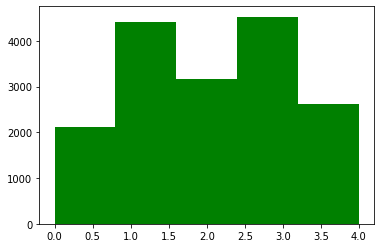

In [123]:
num_bins = 5

colors = ['green'] 
plt.hist(final_train_df.label, density = False, bins = 5, histtype = 'bar', color = colors, label = colors)

In [124]:
Sentence = data.Field(sequential = True, tokenize = 'spacy', batch_first =True, include_lengths=True)
Label = data.LabelField(tokenize ='spacy', is_target=True, batch_first =True, sequential =False)

In [125]:
fields = [('sentence', Sentence),('label',Label)]

In [126]:
example = [data.Example.fromlist([final_train_df.sentence[i],final_train_df.label[i]], fields) for i in range(final_train_df.shape[0])] 

stanTreeDataset = data.Dataset(example, fields)
(train, valid) = stanTreeDataset.split(split_ratio=[0.85, 0.15], random_state=random.seed(SEED))
Sentence.build_vocab(train)
Label.build_vocab(train)

In [127]:
(len(train), len(valid))

(14316, 2526)

In [128]:
print('Size of input vocab : ', len(Sentence.vocab))
print('Size of label vocab : ', len(Label.vocab))
print('Top 10 words appreared repeatedly :', list(Sentence.vocab.freqs.most_common(10)))
print('Labels : ', Label.vocab.stoi)

Size of input vocab :  16892
Size of label vocab :  5
Top 10 words appreared repeatedly : [('.', 12104), (',', 11381), ('the', 9825), ('of', 7142), ('a', 6980), ('and', 6976), ('to', 5011), ('-', 4318), ('is', 3948), ("'s", 3944)]
Labels :  defaultdict(None, {3: 0, 1: 1, 2: 2, 4: 3, 0: 4})


In [129]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [130]:
train_iterator, valid_iterator = data.BucketIterator.splits((train, valid), batch_size = 32, 
                                                            sort_key = lambda x: len(x.sentence),
                                                            sort_within_batch=True, device = device)

In [131]:
next(iter(train_iterator))


[torchtext.legacy.data.batch.Batch of size 32]
	[.sentence]:('[torch.cuda.LongTensor of size 32x26 (GPU 0)]', '[torch.cuda.LongTensor of size 32 (GPU 0)]')
	[.label]:[torch.cuda.LongTensor of size 32 (GPU 0)]

In [132]:
import os, pickle
with open('tokenizer.pkl', 'wb') as tokens: 
    pickle.dump(Sentence.vocab.stoi, tokens)

## **Model Architecture**

In [153]:
import torch.nn as nn
import torch.nn.functional as F

class classifier(nn.Module):
    
    # Define all the layers used in model
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        
        super().__init__()          
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # LSTM layer
        self.encoder = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           dropout=dropout,
                           batch_first=True)
        # try using nn.GRU or nn.RNN here and compare their performances
        # try bidirectional and compare their performances
        
        # Dense layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text, text_lengths):
        
        # text = [batch size, sent_length]
        embedded = self.embedding(text)
        # embedded = [batch size, sent_len, emb dim]
      
        # packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
        
        packed_output, (hidden, cell) = self.encoder(packed_embedded)
        #hidden = [batch size, num layers * num directions,hid dim]
        #cell = [batch size, num layers * num directions,hid dim]
    
        # Hidden = [batch size, hid dim * num directions]
        dense_outputs = self.fc(hidden)   
        
        # Final activation function softmax
        output = F.softmax(dense_outputs[0], dim=1)
            
        return output

In [154]:
# Define hyperparameters
size_of_vocab = len(Sentence.vocab)
embedding_dim = 300
num_hidden_nodes = 100
num_output_nodes = len(final_train_df.label.unique())
num_layers = 2
dropout = 0.2

# Instantiate the model
model = classifier(size_of_vocab, embedding_dim, num_hidden_nodes, num_output_nodes, num_layers, dropout = dropout)

In [155]:
print(model)

#No. of trianable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
print(f'The model has {count_parameters(model):,} trainable parameters')

classifier(
  (embedding): Embedding(16892, 300)
  (encoder): LSTM(300, 100, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=100, out_features=5, bias=True)
)
The model has 5,309,705 trainable parameters


In [156]:
import torch.optim as optim

# define optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=2e-4)
criterion = nn.CrossEntropyLoss()

# define metric
def binary_accuracy(preds, y):
    #round predictions to the closest integer
    _, predictions = torch.max(preds, 1)
    
    correct = (predictions == y).float() 
    acc = correct.sum() / len(correct)
    return acc
    
# push to cuda if available
model = model.to(device)
criterion = criterion.to(device)

## **Model Training & Evaluation**

In [157]:
def train(model, iterator, optimizer, criterion):
    
    # initialize every epoch 
    epoch_loss = 0
    epoch_acc = 0
    
    # set the model in training phase
    model.train()  
    
    for batch in iterator:
        
        # resets the gradients after every batch
        optimizer.zero_grad()   
        
        # retrieve text and no. of words
        sentence, sentence_lengths = batch.sentence
        
        # convert to 1D tensor
        predictions = model(sentence, sentence_lengths).squeeze()  
        #print(predictions)
        # compute the loss
        loss = criterion(predictions, batch.label)        
        
        # compute the binary accuracy
        acc = binary_accuracy(predictions, batch.label)   
        
        # backpropage the loss and compute the gradients
        loss.backward()       
        
        # update the weights
        optimizer.step()      
        
        # loss and accuracy
        epoch_loss += loss.item()  
        epoch_acc += acc.item()    
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [158]:
def evaluate(model, iterator, criterion):
    
    # initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    # deactivating dropout layers
    model.eval()
    
    # deactivates autograd
    with torch.no_grad():
    
        for batch in iterator:
        
            # retrieve text and no. of words
            sentence, sentence_lengths = batch.sentence
            
            # convert to 1d tensor
            predictions = model(sentence, sentence_lengths).squeeze()
            #print(predictions)
            
            # compute loss and accuracy
            loss = criterion(predictions, batch.label)
            acc = binary_accuracy(predictions, batch.label)
            
            # keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [159]:
N_EPOCHS = 100
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    # train the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    #train_loss = train(model, train_iterator, optimizer, criterion)


    # evaluate the model
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    #valid_loss = evaluate(model, valid_iterator, criterion)
    
    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    print(f'\tEpoch: {epoch} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')

	Epoch: 0 | Train Loss: 1.582 | Train Acc: 28.15%
	 Val. Loss: 1.570 |  Val. Acc: 31.90% 

	Epoch: 1 | Train Loss: 1.541 | Train Acc: 35.12%
	 Val. Loss: 1.527 |  Val. Acc: 36.69% 

	Epoch: 2 | Train Loss: 1.484 | Train Acc: 41.65%
	 Val. Loss: 1.496 |  Val. Acc: 40.06% 

	Epoch: 3 | Train Loss: 1.436 | Train Acc: 46.61%
	 Val. Loss: 1.477 |  Val. Acc: 42.03% 

	Epoch: 4 | Train Loss: 1.392 | Train Acc: 51.80%
	 Val. Loss: 1.462 |  Val. Acc: 43.69% 

	Epoch: 5 | Train Loss: 1.349 | Train Acc: 56.33%
	 Val. Loss: 1.448 |  Val. Acc: 44.81% 

	Epoch: 6 | Train Loss: 1.310 | Train Acc: 60.69%
	 Val. Loss: 1.440 |  Val. Acc: 45.68% 

	Epoch: 7 | Train Loss: 1.271 | Train Acc: 65.06%
	 Val. Loss: 1.434 |  Val. Acc: 45.88% 

	Epoch: 8 | Train Loss: 1.236 | Train Acc: 68.31%
	 Val. Loss: 1.421 |  Val. Acc: 46.55% 

	Epoch: 9 | Train Loss: 1.207 | Train Acc: 71.35%
	 Val. Loss: 1.420 |  Val. Acc: 47.58% 

	Epoch: 10 | Train Loss: 1.183 | Train Acc: 73.42%
	 Val. Loss: 1.402 |  Val. Acc: 49.73% 

In [160]:
#load weights and tokenizer

path='./saved_weights.pt'
model.load_state_dict(torch.load(path));
model.eval();
tokenizer_file = open('./tokenizer.pkl', 'rb')
tokenizer = pickle.load(tokenizer_file)

#inference 

import spacy
nlp = spacy.load('en')

def classify_sentence(sentence):
        
    # tokenize the sentence 
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)] 
    # convert to integer sequence using predefined tokenizer dictionary
    indexed = [tokenizer[t] for t in tokenized]        
    # compute no. of words        
    length = [len(indexed)]
    # convert to tensor                                    
    tensor = torch.LongTensor(indexed).to(device)   
    # reshape in form of batch, no. of words           
    tensor = tensor.unsqueeze(1).T  
    # convert to tensor                          
    length_tensor = torch.LongTensor(length)
    # Get the model prediction                  
    prediction = model(tensor, length_tensor)

    _, pred = torch.max(prediction, 1) 
    
    #return categories[pred.item()]
    return pred.item()

In [161]:
classify_sentence("A valid explanation for why Trump won't let women on the golf course.")

0

In [162]:
classify_sentence("The movie had zilch character, nada screenplay, zero action scenes, almost negligible thougts")

1

In [163]:
classify_sentence("5 minutes into the movie, you feel you want to runaway but eventually the movie catches on and does a great job")

2

In [164]:
type(valid)

torchtext.legacy.data.dataset.Dataset

In [165]:
vars(valid.examples[0])

{'label': 3,
 'sentence': ['It',
  'from',
  'worst',
  ',',
  'topical',
  'it',
  ',',
  'performances',
  'of',
  ',',
  'feature',
  'decent',
  'battle',
  '.']}

In [166]:
classify_sentence("The story bogs down in a mess of purposeless violence.")

1

In [167]:
vars(valid.examples[1])

{'label': 2,
 'sentence': ['was',
  'Chekhov',
  'is',
  'better',
  'of',
  'no',
  'Chekhov',
  ',',
  'but',
  'it',
  'would',
  'be',
  'a',
  'plays',
  'your',
  'this',
  '.',
  'if',
  'introduction',
  'to',
  'one',
  'of',
  'the',
  'greatest',
  'shame',
  'than',
  'the',
  'last',
  '100',
  'years',
  'Any']}

In [168]:
valid.examples[1].label

2

In [169]:
' '.join(valid.examples[1].sentence)

'was Chekhov is better of no Chekhov , but it would be a plays your this . if introduction to one of the greatest shame than the last 100 years Any'

In [170]:
for i in range(10):
  print(f"label is {valid.examples[i].label}")

label is 3
label is 2
label is 1
label is 4
label is 2
label is 0
label is 1
label is 3
label is 3
label is 3


In [171]:
for i in range(10):
  pred = classify_sentence(' '.join(valid.examples[i].sentence))
  print(f"predicted label is {pred}")

predicted label is 0
predicted label is 1
predicted label is 1
predicted label is 3
predicted label is 2
predicted label is 4
predicted label is 0
predicted label is 2
predicted label is 4
predicted label is 0
